<a href="https://colab.research.google.com/github/subhashdixit/Data_Science_Materials_Topicwise/blob/main/Machine_Learning/Logistics_Regression/Algerian_Forest_Dataset/Algerian_Forest_FIre_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**
1 . Classification problem of Algerian forest fire which will predict whether fire will be occur or not based on different features


**Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Read data from github**

In [2]:
url = "https://raw.githubusercontent.com/subhashdixit/Data_Science_Materials_Topicwise/main/Machine_Learning/Logistics_Regression/Algerian_Forest_Dataset/Algerian_forest_fires_dataset.csv"
df = pd.read_csv(url, header = 1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


**Dataset information**
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8 FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire
13. Region : Manually created column based on two region i.e., Bejaia Region Dataset and Sidi-Bel Abbes Region Dataset. This column is created just to classify both the regions

**Data Checks and cleaning**

**Checking Null Values**

In [4]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


**Drop rows which have null value**

In [5]:
df.drop([122,123, 167],axis=0, inplace=True)
df = df.reset_index()
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


**Show all the columns**

In [6]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

**Column name having extra space**

In [7]:
[x for x in df.columns if ' ' in x]

[' RH', ' Ws', 'Rain ', 'Classes  ']

**Remove extra space in column names**

In [8]:
df.columns = df.columns.str.strip()
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

**Function to remove extra space in the data**

In [9]:
import re
def Remove_Extra_Space(x):
  return (re.sub(' +', ' ', x).strip())

**Remove extra space in the data**

In [10]:
df['Classes'] = df['Classes'].apply(Remove_Extra_Space)

**Drop extra index column, which was created for reset_index**

In [11]:
df.drop(['index'],axis=1, inplace=True)

**Create data feature with the help of day, month and year feature and converted to datetime**

In [12]:
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])

**Drop day, month and year feature**

In [13]:
df.drop(['day', 'month', 'year'], axis = 1, inplace = True)

**Create one region,just to identify the two region i.e.,Sidi-Bel Abbes Region and Bejaia Region**

In [14]:
df.loc[:122, 'Region'] = 0
df.loc[122:, 'Region'] = 1

**check null values in all the features**

In [15]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
date           0
Region         0
dtype: int64

**Map classes feature as 1 and 0 for fire and not fire respectively**

In [16]:
df['Classes'] = df['Classes'].map({'not fire' : 0, 'fire': 1})

**Check duplictes values in all the column**

In [17]:
df.duplicated().sum()

0

**Check data types of all the features**

In [18]:
df.dtypes

Temperature            object
RH                     object
Ws                     object
Rain                   object
FFMC                   object
DMC                    object
DC                     object
ISI                    object
BUI                    object
FWI                    object
Classes                 int64
date           datetime64[ns]
Region                float64
dtype: object

**Convert features to its logical datatpe**

In [19]:
convert_data = {'Temperature' : 'float64', 'RH': 'float64', 'Ws': 'float64',
 'DMC' : 'float64', 'DC' : 'float64', 'ISI': 'float64', 'BUI': 'float64', 'FWI' : 'float64', 
 'Region' : 'object', 'Rain' : 'float64', 'FFMC' : 'float64' , 'Classes':'object'}
df = df.astype(convert_data)

**Converted datatpyes**

In [20]:
df.dtypes

Temperature           float64
RH                    float64
Ws                    float64
Rain                  float64
FFMC                  float64
DMC                   float64
DC                    float64
ISI                   float64
BUI                   float64
FWI                   float64
Classes                object
date           datetime64[ns]
Region                 object
dtype: object

**Check unique values in all the features**

In [21]:
df.nunique()

Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            125
Classes          2
date           122
Region           2
dtype: int64

**Check statistics of dataset**

In [22]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


**Observations**
1. Maximum temperature and RH are 42 degree celsius and 90 % respectively
2. Minimum rain is 0 mm


**Segregate categorical feature from the dataset**

In [23]:
categorical_feature=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_feature

['Classes', 'Region']

In [24]:
for feature in categorical_feature:
 print(df.groupby(feature)[feature].value_counts())

Classes  Classes
0        0          106
1        1          137
Name: Classes, dtype: int64
Region  Region
0.0     0.0       122
1.0     1.0       121
Name: Region, dtype: int64


**Segregate categorical feature from the dataset**

In [25]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print(numerical_features)

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'date']


# **Graphical Analysis**

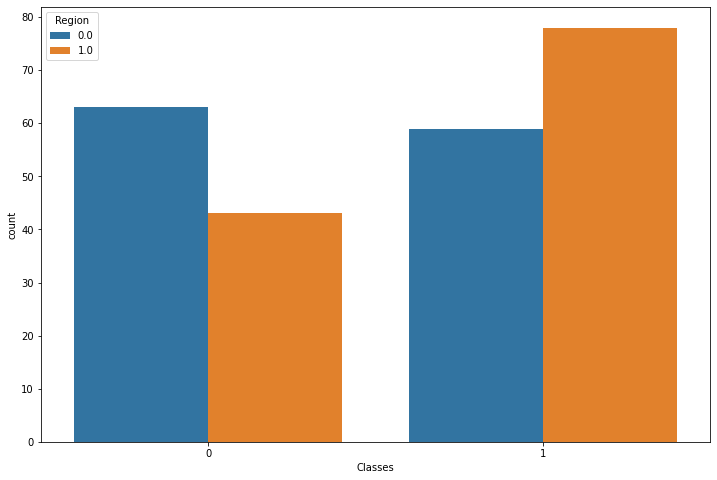

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Classes', hue='Region')

**Observation**
* Sidi Bel-abbes region has more occurance of fire than Bejaia region


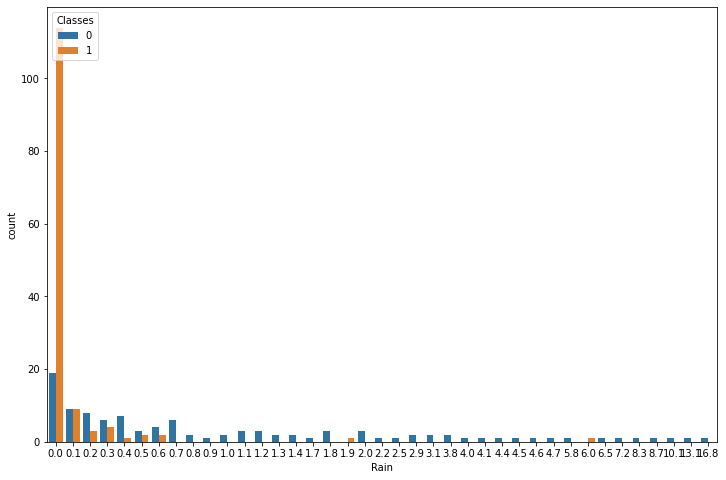

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(data = df, x = 'Rain', hue='Classes')

**Observation**
* Most of the fires occured when Rain was 0 mm

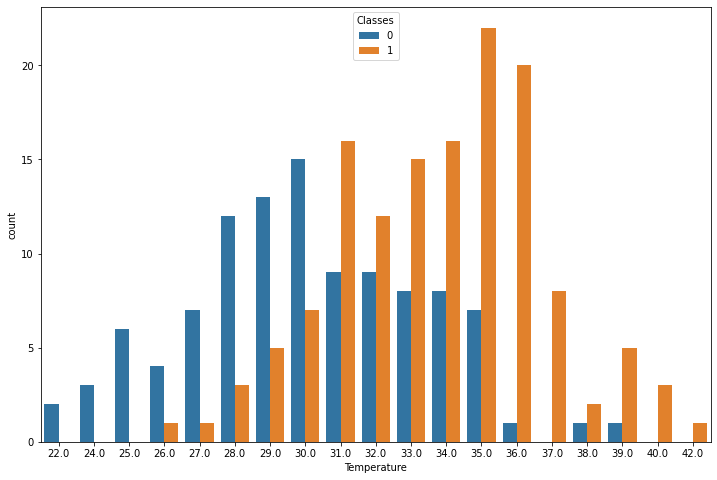

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(data = df, x = 'Temperature', hue='Classes')

**Observation**
* Most of the fires occured when temperature was between 30 to 37 degree celsius


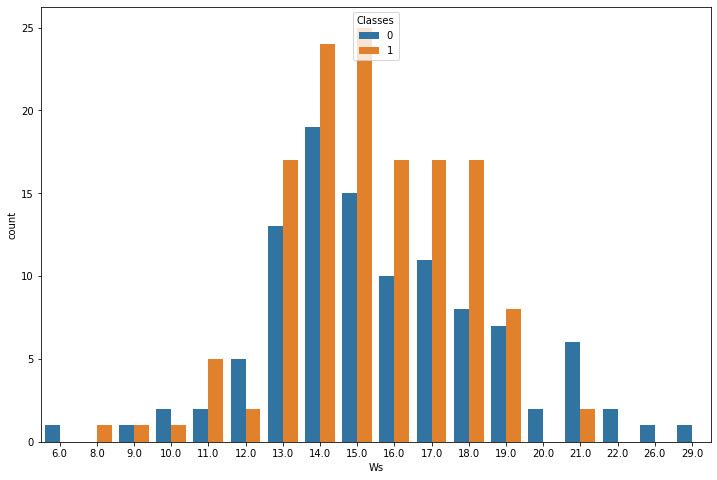

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(data = df, x = 'Ws', hue='Classes')

**Observation**
* Most of the fires occurs when wind speed is between 13 to 19 km/h


[Text(0, 0, '21.0'),
 Text(0, 0, '24.0'),
 Text(0, 0, '26.0'),
 Text(0, 0, '29.0'),
 Text(0, 0, '31.0'),
 Text(0, 0, '33.0'),
 Text(0, 0, '34.0'),
 Text(0, 0, '35.0'),
 Text(0, 0, '36.0'),
 Text(0, 0, '37.0'),
 Text(0, 0, '38.0'),
 Text(0, 0, '39.0'),
 Text(0, 0, '40.0'),
 Text(0, 0, '41.0'),
 Text(0, 0, '42.0'),
 Text(0, 0, '43.0'),
 Text(0, 0, '44.0'),
 Text(0, 0, '45.0'),
 Text(0, 0, '46.0'),
 Text(0, 0, '47.0'),
 Text(0, 0, '48.0'),
 Text(0, 0, '49.0'),
 Text(0, 0, '50.0'),
 Text(0, 0, '51.0'),
 Text(0, 0, '52.0'),
 Text(0, 0, '53.0'),
 Text(0, 0, '54.0'),
 Text(0, 0, '55.0'),
 Text(0, 0, '56.0'),
 Text(0, 0, '57.0'),
 Text(0, 0, '58.0'),
 Text(0, 0, '59.0'),
 Text(0, 0, '60.0'),
 Text(0, 0, '61.0'),
 Text(0, 0, '62.0'),
 Text(0, 0, '63.0'),
 Text(0, 0, '64.0'),
 Text(0, 0, '65.0'),
 Text(0, 0, '66.0'),
 Text(0, 0, '67.0'),
 Text(0, 0, '68.0'),
 Text(0, 0, '69.0'),
 Text(0, 0, '70.0'),
 Text(0, 0, '71.0'),
 Text(0, 0, '72.0'),
 Text(0, 0, '73.0'),
 Text(0, 0, '74.0'),
 Text(0, 0, '

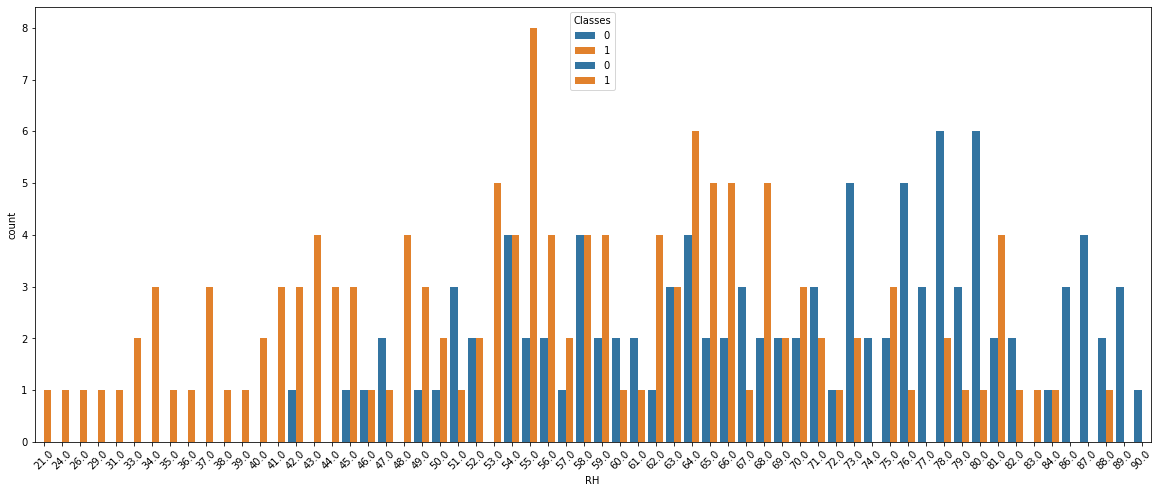

In [30]:
plt.figure(figsize=(20,8))
sns.countplot(data = df, x = 'RH', hue='Classes').set_xticklabels(sns.countplot(data = df, x = 'RH', hue='Classes').get_xticklabels(), rotation=45)

**Observation**
* Maximum fires occurs when Relative humidity is between 37 % to 70 %

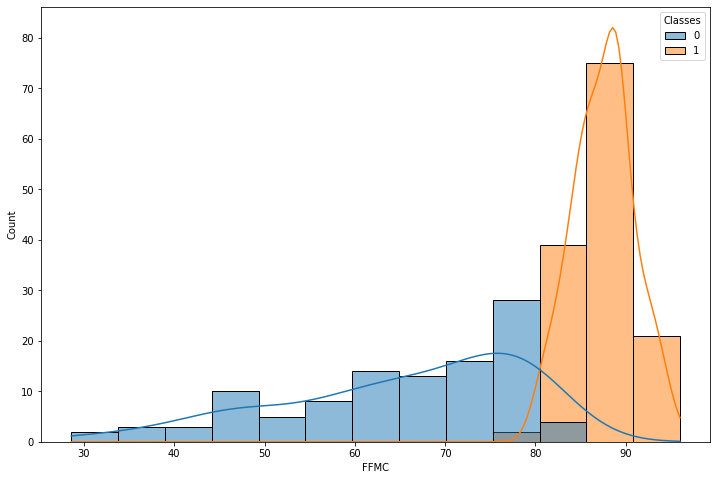

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(data=df,x='FFMC',kde=True,hue='Classes')

**Observation**
* Most of the fires occurs when FFMC is between 80 to 90

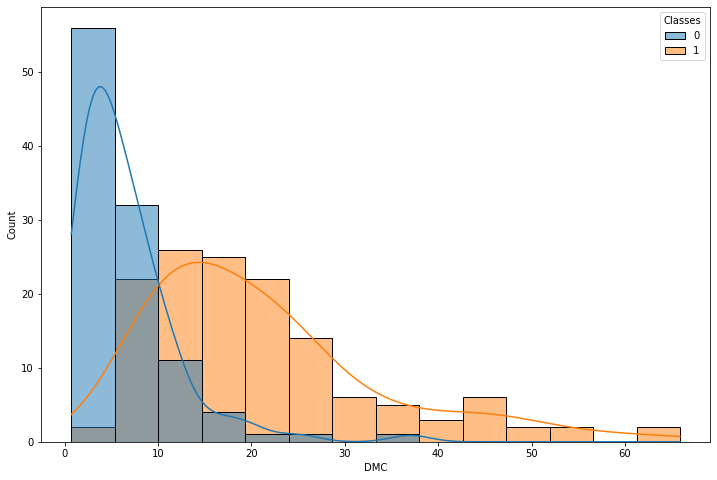

In [32]:
plt.figure(figsize=(12,8))
sns.histplot(data=df,x='DMC',kde=True,hue='Classes')

**Observation**
* Based on the distribution we can see that most of the fires occurs when DMC is between 10 to 30

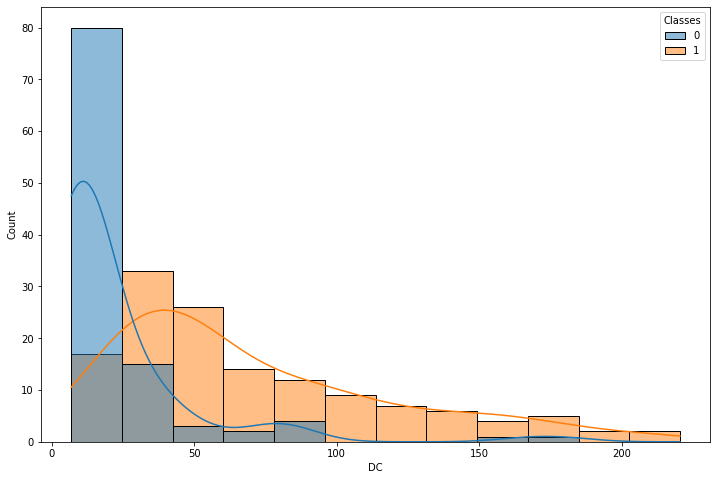

In [33]:
plt.figure(figsize=(12,8))
sns.histplot(data=df,x='DC',kde=True,hue='Classes')

**Observation**
* Based on the distribution we can see that fires occurs when DC is above 25


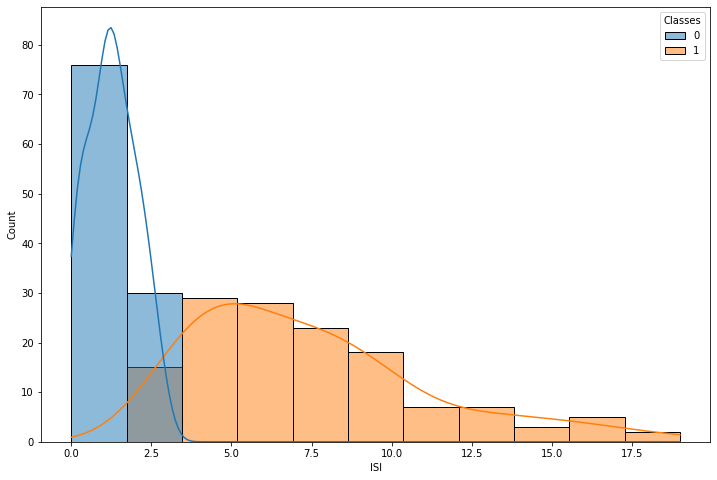

In [34]:
plt.figure(figsize=(12,8))
sns.histplot(data=df,x='ISI',kde=True,hue='Classes')

**Observation**
* Fires occurs when ISI is above 2.5 and below 10


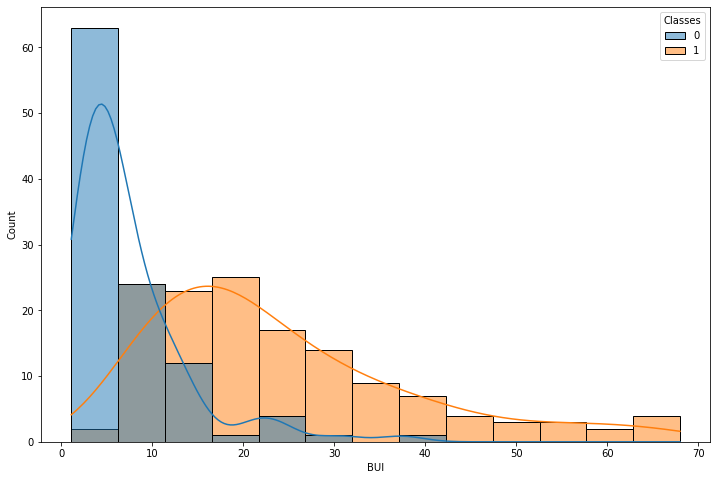

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(data=df,x='BUI',kde=True,hue='Classes')

**Observation**
* Most of the fires occurs when BUI is between 10 and 40


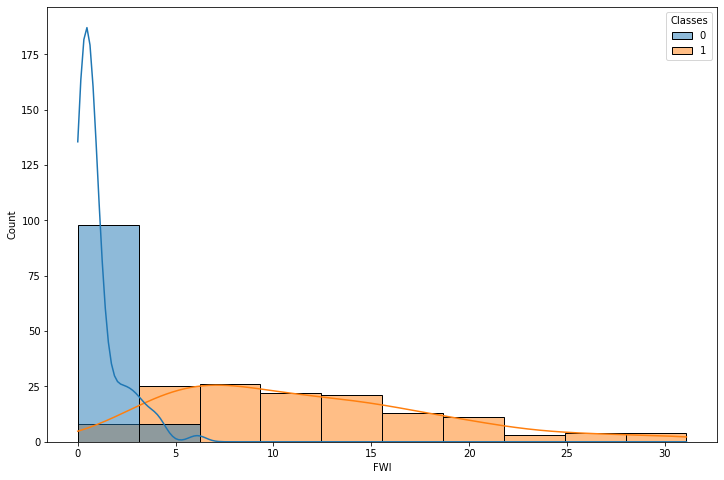

In [36]:
plt.figure(figsize=(12,8))
sns.histplot(data=df,x='FWI',kde=True,hue='Classes')

**Observation**
* Most of the fires occurs when BUI is between 5 and 25


# **Outlier handling**

**Create a function which will return upper and lower limit for outliers**

In [37]:
def find_boundaries(df, variable, distance):
 IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
 lower_boundary = df[variable].quantile(0.25) - (IQR*distance)
 upper_boundary = df[variable].quantile(0.75) + (IQR*distance)
 return upper_boundary, lower_boundary

**Box plot for all the features before handling outliers**

Text(0.5, 1.0, 'Before Removing Outliers')

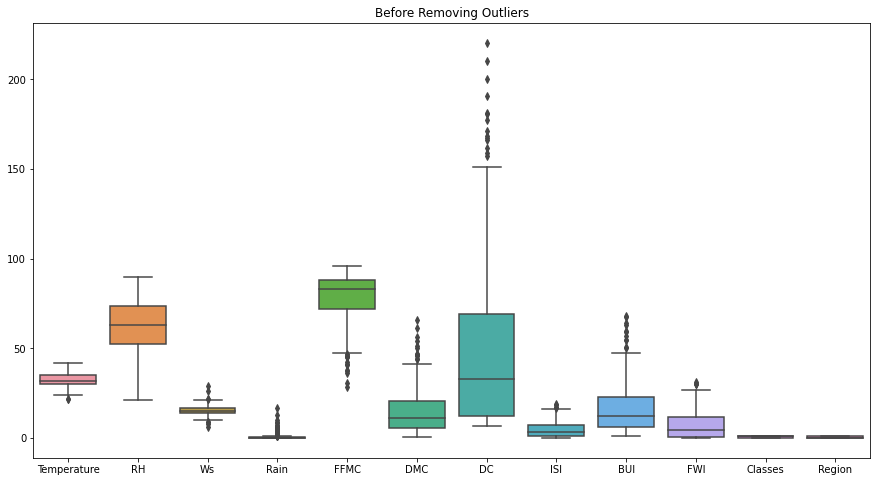

In [38]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("Before Removing Outliers")

**Remove the outliers from all the columns**

In [39]:
outliers_columns = ['Temperature', 'Ws','Rain','FFMC','DMC','DC','ISI','BUI', 'FWI']
for i in outliers_columns:
  upper_boundary, lower_boundary = find_boundaries(df,i, 1.5)
  outliers = np.where(df[i] > upper_boundary, True, np.where(df[i] < lower_boundary, True, False))
  outliers_df = df.loc[outliers, i]
  df_trimed= df.loc[~outliers, i]
  df[i] = df_trimed

**Box plot for all the features after handling outliers**

Text(0.5, 1.0, 'After Removing Outliers')

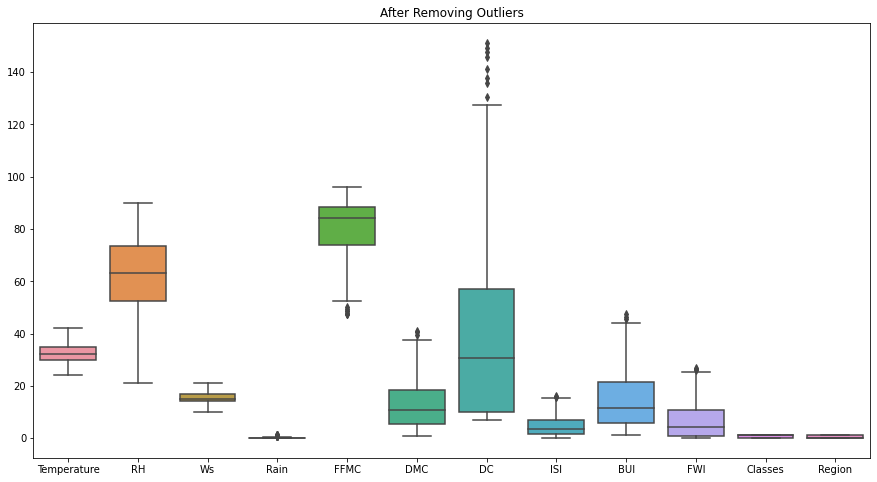

In [40]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("After Removing Outliers")

**Check all the null values after the removal of outliers**

In [41]:
df.isnull().sum()

Temperature     2
RH              0
Ws              8
Rain           35
FFMC           13
DMC            12
DC             14
ISI             4
BUI            11
FWI             4
Classes         0
date            0
Region          0
dtype: int64

**Create a copy of dataframe (df)**

In [42]:
df_copy = df

**Impute all the null values with mean**

In [43]:
df_copy.fillna(df_copy.mean().round(1), inplace=True)

**Check sum of null value in all the features after imputation**

In [44]:
df_copy.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
date           0
Region         0
dtype: int64

**Drop target variable from X and stored it in y**

In [45]:
X = df_copy.drop(columns=['Classes'])
y = df_copy['Classes']

**Check distribution of all the features wrt target variable i.e., Classes**

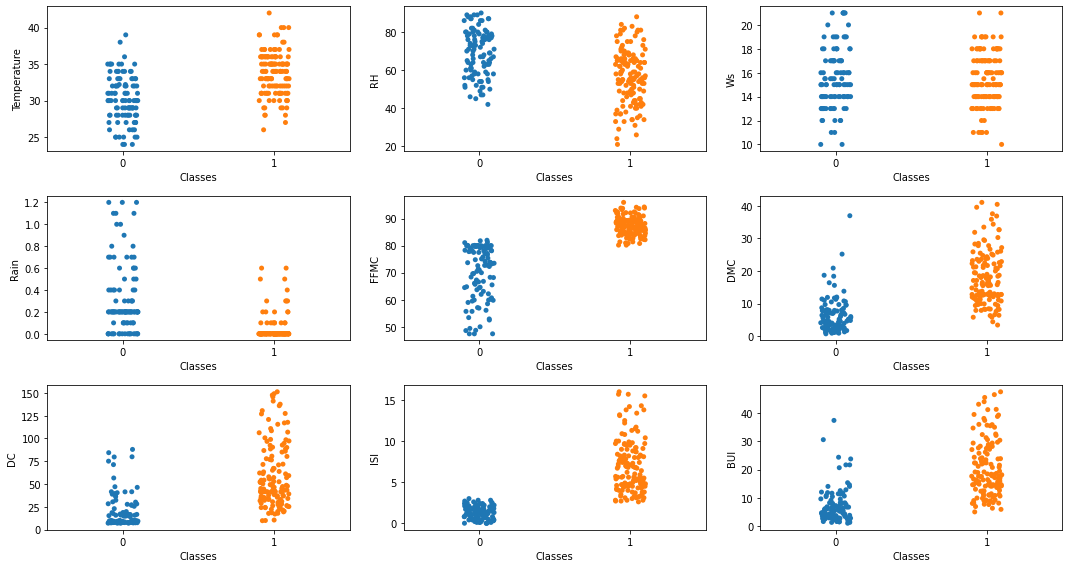

In [46]:
plt.figure(figsize=(15,8), facecolor='white')
plotnumber = 1
for column in X:
 if plotnumber <= 9:
  ax = plt.subplot(3,3,plotnumber)
  sns.stripplot(y,X[column])
 plotnumber+=1
plt.tight_layout()

# **Logistic Regression Model Creation**

**Import all the required libraries**

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()

Create a list of all the features which needs to be scaled

In [48]:
X = X[['Temperature', 'RH', 'Rain', 'Ws', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]

Create object of StandardScaler class to perform standard scaling

In [49]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

Check multicollinearity using VIF

In [50]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,2.252810,Temperature
1,2.345986,RH
2,1.647905,Rain
3,1.200894,Ws
4,2.967616,FFMC
5,7.830671,DMC
6,3.676700,DC
7,6.735939,ISI
8,10.841165,BUI
9,7.216442,FWI


* If VIF == 1 --> Variables are not correlated
* If 1 < VIF < 5 --> variables are moderately correlated
* If VIF > 5 --> variables are highly correlated


**Perform train test split using trat_test_split function of sckitik learn**

In [51]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 42)

**Create a object of Logistic Regression to perform model training**

In [52]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [53]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
 pickle.dump(log_reg,f)

with open('sandardScalar.sav', 'wb') as f:
 pickle.dump(scalar,f)

**Predicit the value for x_test and stored it in y_pred**

In [54]:
y_pred = log_reg.predict(x_test)

# **Performance metrics**

**Test Data**

In [55]:
accuracy = accuracy_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
Precision = true_positive/(true_positive+false_positive)
Recall = true_positive/(true_positive+false_negative)
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
auc = roc_auc_score(y_test, y_pred)
print(f" Confusion Matrix : {conf_mat}")
print(f" Accuracy : {accuracy*100}")
print(f" Precision : {Precision*100}")
print(f" Recall : {Recall*100}")
print(f" F1_Score : {F1_Score*100}")
print(f" AUC : {auc*100}")

 Confusion Matrix : [[23  1]
 [ 2 35]]
 Accuracy : 95.08196721311475
 Precision : 95.83333333333334
 Recall : 92.0
 F1_Score : 93.87755102040816
 AUC : 95.21396396396398


**Predicit the value for x_test and stored it in y_pred**

In [56]:
y_pred = log_reg.predict(x_train)

**Train Data**

In [57]:
accuracy = accuracy_score(y_train,y_pred)
conf_mat = confusion_matrix(y_train,y_pred)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
Precision = true_positive/(true_positive+false_positive)
Recall = true_positive/(true_positive+false_negative)
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
auc = roc_auc_score(y_train, y_pred)
print(f" Confusion Matrix : {conf_mat}")
print(f" Accuracy : {accuracy*100}")
print(f" Precision : {Precision*100}")
print(f" Recall : {Recall*100}")
print(f" F1_Score : {F1_Score*100}")
print(f" AUC : {auc*100}")

 Confusion Matrix : [[80  2]
 [ 3 97]]
 Accuracy : 97.25274725274726
 Precision : 97.5609756097561
 Recall : 96.3855421686747
 F1_Score : 96.96969696969697
 AUC : 97.28048780487805


Conclusion:
* All the value for all the performance matrics are good and hence our model is prediction well for train and test data. As observed it is a imbalnced dataset. We will try to fix this probem in the next article 